## Heart Disease Prediction— Multiclass Classification

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import classification_report, accuracy_score

In [58]:
# import the heart disease dataset
dataset = "http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

column_names =  ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','class']

# read the csv
dataset = pd.read_csv(dataset, names=column_names)

# remove missing data with "?"
df = dataset[~dataset.isin(['?'])]

#drop rows with NaN values from DataFrame
df = df.dropna(axis=0)

# checking data type of the dataframe
print (df.dtypes)

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
class         int64
dtype: object


In [59]:
# transform data to numeric because ca and thal are object datatypes
data = df.apply(pd.to_numeric)
print(data.dtypes)

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
class         int64
dtype: object


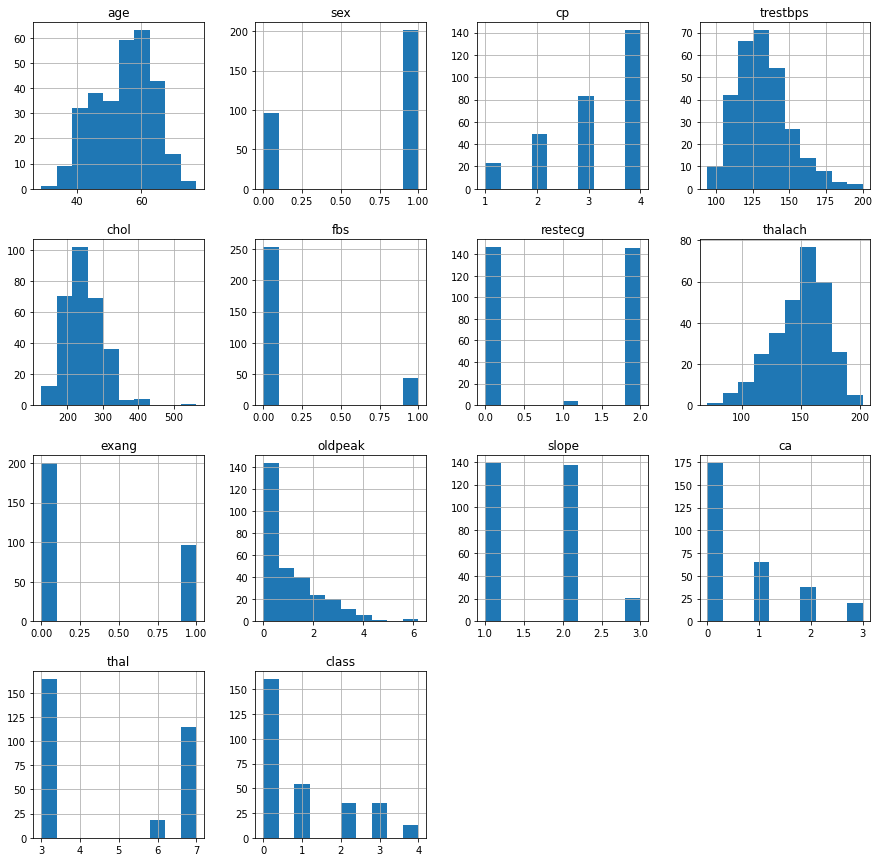

In [60]:
# plot histograms for each variable
data.hist(figsize = (15, 15))
plt.show()

In [61]:
# create X and Y datasets for training
X = data.iloc[:,0:13]
y = data.iloc[:,-1]

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,shuffle = False, random_state=90)

# There are 4 classes so we need to one-hot encode them
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [74]:
# create model
model = Sequential()
model.add(Dense(10, input_dim=13, kernel_initializer='normal', activation='relu'))
model.add(Dense(8, kernel_initializer='normal', activation='relu'))
model.add(Dense(4, kernel_initializer='normal', activation='relu'))
model.add(Dense(5, activation='softmax'))

filepath="CNN_Model-{epoch:02d}-{val_accuracy:.2f}.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [75]:
# compile model
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [76]:
train_model = model.fit(X_train, y_train, epochs=60, batch_size=8, verbose = 1, validation_data=(X_test,y_test),callbacks=[callbacks_list])

Epoch 1/60
 1/30 [>.............................] - ETA: 18s - loss: 1.6254 - accuracy: 0.1250
Epoch 00001: val_accuracy improved from -inf to 0.48333, saving model to CNN_Model-01-0.48.h5
30/30 [==============================] - 1s 12ms/step - loss: 1.5482 - accuracy: 0.4768 - val_loss: 1.4624 - val_accuracy: 0.4833
Epoch 2/60
26/30 [=========================>....] - ETA: 0s - loss: 1.3214 - accuracy: 0.5481
Epoch 00002: val_accuracy did not improve from 0.48333
30/30 [==============================] - 0s 4ms/step - loss: 1.3139 - accuracy: 0.5527 - val_loss: 1.3496 - val_accuracy: 0.4833
Epoch 3/60
 1/30 [>.............................] - ETA: 0s - loss: 1.7030 - accuracy: 0.3750
Epoch 00003: val_accuracy did not improve from 0.48333
30/30 [==============================] - 0s 3ms/step - loss: 1.2839 - accuracy: 0.5527 - val_loss: 1.3324 - val_accuracy: 0.4833
Epoch 4/60
29/30 [============================>.] - ETA: 0s - loss: 1.2720 - accuracy: 0.5474
Epoch 00004: val_accuracy did n

In [77]:
# Plotting the model
plt.plot(train_model.history['accuracy'], marker='.')
plt.plot(train_model.history['val_accuracy'], marker='.')
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.grid()
plt.legend(['accuracy', 'val_accuracy'], loc='lower right')
plt.savefig('model_accuracy.png')
plt.close()

plt.plot(train_model.history['loss'], marker='.')
plt.plot(train_model.history['val_loss'], marker='.')
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid()
plt.legend(['loss', 'val_loss'], loc='upper right')
plt.savefig('model_loss.png')
plt.close()

In [78]:
pred = model.predict(X_test)

print('Maximum Probabilities of Test Dataset: ',np.max(pred, axis=-1))

Maximum Probabilities of Test Dataset:  [0.92982656 0.94296086 0.934381   0.5476818  0.59552157 0.3213791
 0.58162946 0.2503766  0.5012551  0.8655031  0.24537219 0.27476177
 0.27476177 0.8766711  0.92104095 0.97236055 0.7001706  0.5760018
 0.8289416  0.65930563 0.850089   0.81192714 0.9680499  0.95790875
 0.27476177 0.24724513 0.25791577 0.88838583 0.9293734  0.27476177
 0.24825796 0.27476177 0.73300666 0.8936007  0.67444223 0.79103184
 0.92801726 0.9003078  0.7919724  0.23917204 0.96616626 0.27476177
 0.9755662  0.68972516 0.27476177 0.27476177 0.8084939  0.9500949
 0.4945368  0.92929363 0.3004811  0.27476177 0.7907556  0.9860619
 0.27476177 0.26288295 0.53432155 0.27476177 0.27476177 0.9422729 ]


In [79]:
for i in pred:
    if(np.max(i) > 0.8):
        print("Critical")
    elif(np.max(i) > 0.5):
        print("moderate or severe")
    elif(np.max(i) > 0.3):
        print("mild or moderate")
    else:
        print("None")

Critical
Critical
Critical
moderate or severe
moderate or severe
mild or moderate
moderate or severe
None
moderate or severe
Critical
None
None
None
Critical
Critical
Critical
moderate or severe
moderate or severe
Critical
moderate or severe
Critical
Critical
Critical
Critical
None
None
None
Critical
Critical
None
None
None
moderate or severe
Critical
moderate or severe
moderate or severe
Critical
Critical
moderate or severe
None
Critical
None
Critical
moderate or severe
None
None
Critical
Critical
mild or moderate
Critical
mild or moderate
None
moderate or severe
Critical
None
None
moderate or severe
None
None
Critical


In [80]:
# need to take argmax if it is a multiclass problem
y_pred = np.argmax(pred, axis=1)
y_test = np.argmax(y_test, axis=1)


print('Classification Accuracy: '+str(accuracy_score(y_test, y_pred) * 100)+' %')

Classification Accuracy: 50.0 %
